<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.2 MB/s eta 0:00:00


ReviewSentiment 8.635000000000002


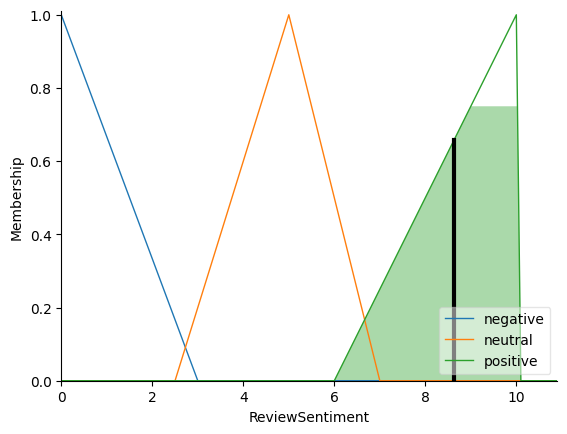

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

SentimentScore = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'SentimentScore')
EmotionIntensity = ctrl.Antecedent(np.arange(0, 11, 1), 'EmotionIntensity')
PositiveWordCount = ctrl.Antecedent(np.arange(0, 11, 1), 'PositiveWordCount')
NegativeWordCount = ctrl.Antecedent(np.arange(0, 11, 1), 'NegativeWordCount')

ReviewSentiment = ctrl.Consequent(np.arange(0, 11, 0.1), 'ReviewSentiment')

SentimentScore['negative'] = fuzz.trimf(SentimentScore.universe, [0.0, 0.0, 0.3])
SentimentScore['neutral']  = fuzz.trimf(SentimentScore.universe, [0.25, 0.5, 0.7])
SentimentScore['positive'] = fuzz.trimf(SentimentScore.universe, [0.6, 1.0, 1.0])

EmotionIntensity['low'] = fuzz.trimf(EmotionIntensity.universe, [0, 0, 3])
EmotionIntensity['medium'] = fuzz.trimf(EmotionIntensity.universe, [2, 5, 7])
EmotionIntensity['high'] = fuzz.trimf(EmotionIntensity.universe, [6, 10, 10])

PositiveWordCount['few'] = fuzz.trimf(PositiveWordCount.universe, [0, 0, 2])
PositiveWordCount['some'] = fuzz.trimf(PositiveWordCount.universe, [2, 4, 5])
PositiveWordCount['many'] = fuzz.trimf(PositiveWordCount.universe, [5, 10, 10])

NegativeWordCount['few'] = fuzz.trimf(NegativeWordCount.universe, [0, 0, 2])
NegativeWordCount['some'] = fuzz.trimf(NegativeWordCount.universe, [2, 4, 5])
NegativeWordCount['many'] = fuzz.trimf(NegativeWordCount.universe, [5, 10, 10])

ReviewSentiment['negative'] = fuzz.trimf(ReviewSentiment.universe, [0.0, 0.0, 3])
ReviewSentiment['neutral']  = fuzz.trimf(ReviewSentiment.universe, [2.5, 5, 7])
ReviewSentiment['positive'] = fuzz.trimf(ReviewSentiment.universe, [6, 10, 10])

rules = [
    ctrl.Rule(SentimentScore['negative'] & EmotionIntensity['high'], ReviewSentiment['negative']),
    ctrl.Rule(SentimentScore['negative'] & EmotionIntensity['low'], ReviewSentiment['neutral']),
    ctrl.Rule(SentimentScore['neutral'] & EmotionIntensity['medium'], ReviewSentiment['neutral']),
    ctrl.Rule(SentimentScore['positive'] & EmotionIntensity['high'], ReviewSentiment['positive']),

    ctrl.Rule(PositiveWordCount['many'] & NegativeWordCount['few'], ReviewSentiment['positive']),
    ctrl.Rule(PositiveWordCount['few'] & NegativeWordCount['many'], ReviewSentiment['negative']),
    ctrl.Rule(PositiveWordCount['some'] & NegativeWordCount['some'], ReviewSentiment['neutral']),

    ctrl.Rule(SentimentScore['negative'] & NegativeWordCount['many'] & EmotionIntensity['high'], ReviewSentiment['negative']),
    ctrl.Rule(SentimentScore['neutral'] & EmotionIntensity['medium'] & PositiveWordCount['some'], ReviewSentiment['neutral']),
    ctrl.Rule(SentimentScore['positive'] & PositiveWordCount['many'] & EmotionIntensity['high'], ReviewSentiment['positive']),
]

ctrl_sys = ctrl.ControlSystem(rules)
RvSenti_sys = ctrl.ControlSystemSimulation(ctrl_sys)

RvSenti_sys.input['SentimentScore']= 0.92
RvSenti_sys.input['EmotionIntensity']= 9
RvSenti_sys.input['PositiveWordCount']=7
RvSenti_sys.input['NegativeWordCount']=0

RvSenti_sys.compute()

print('ReviewSentiment',RvSenti_sys.output['ReviewSentiment'])
ReviewSentiment.view(sim=RvSenti_sys)